In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#mouse_drug_data.head()
#clinical_trial_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_data, clinical_trial_data, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = combined_data[["Drug","Timepoint","Tumor Volume (mm3)"]]
#tumor_volume_data.head()
tumor_volume_mean = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_tumor_volume_mean = pd.DataFrame(tumor_volume_mean).reset_index()
# Preview DataFrame
df_tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_tumor_volume_sem = pd.DataFrame(tumor_volume_sem).reset_index()

# Preview DataFrame
df_tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_volume_mean_reform = df_tumor_volume_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
df_tumor_volume_sem_reform = df_tumor_volume_sem.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
df_tumor_volume_mean_reform
#df_tumor_volume_sem_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


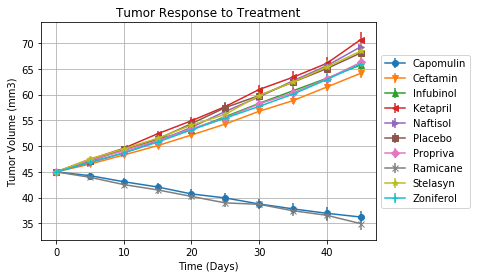

In [13]:
# Generate the Plot (with Error Bars)
graph_tumor_vol = df_tumor_volume_mean_reform.plot(yerr = df_tumor_volume_sem_reform, grid=True, title="Tumor Response to Treatment")

#style
graph_tumor_vol.set_ylabel("Tumor Volume (mm3)")
graph_tumor_vol.set_xlabel("Time (Days)")

markers = ['o','v','^','<','>','s','D','x','*','+']
for i,line in enumerate(graph_tumor_vol.get_lines()):
    line.set_marker(markers[i])
    
graph_tumor_vol.legend(loc="center left", bbox_to_anchor=(1, 0.5))


# Save the Figure
plt.savefig('graph_tumor_vol.png', bbox_inches="tight")


## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
df_met_sites_mean = pd.DataFrame(met_sites_mean).reset_index()

# Preview DataFrame
df_met_sites_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
df_met_sites_sem = pd.DataFrame(met_sites_sem).reset_index()

# Preview DataFrame
df_met_sites_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
df_met_sites_mean_reform = df_met_sites_mean.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
df_met_sites_sem_reform = df_met_sites_sem.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
df_met_sites_mean_reform.head()
#df_met_sites_sem_reform.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


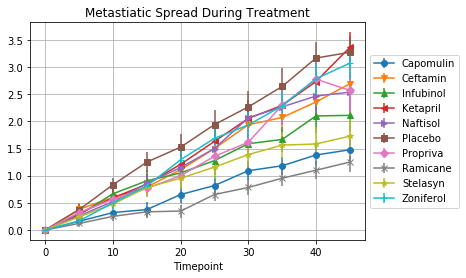

In [17]:
# Generate the Plot (with Error Bars)
graph_met_sites = df_met_sites_mean_reform.plot(yerr = df_met_sites_sem_reform, grid=True, title="Metastiatic Spread During Treatment")

#style
graph_tumor_vol.set_ylabel("Met. Sites")
graph_tumor_vol.set_xlabel("Treatment Duration(Days)")

markers = ['o','v','^','<','>','s','D','x','*','+']
for i,line in enumerate(graph_met_sites.get_lines()):
    line.set_marker(markers[i])
    
graph_met_sites.legend(loc="center left", bbox_to_anchor=(1, 0.5))


# Save the Figure
plt.savefig('graph_met_sites.png', bbox_inches="tight")

# Show the Figure


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_data[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).agg(["count"]).reset_index()

# Convert to DataFrame

# Preview DataFrame
#mouse_count.columns.values
mouse_count.head()

,Drug,Timepoint,Metastatic Sites
,,,count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Minor Data Munging to Re-Format the Data Frames
df_survive_count_reform = mouse_count.pivot(index="Timepoint", columns="Drug", values=('Metastatic Sites', 'count'))
df_survive_rate = df_survive_count_reform/df_survive_count_reform.loc[0]*100

# Preview the Data Frame
pd.options.display.float_format = '{:,.0f}'.format
df_survive_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96,100,96,96
10,100,80,84,88,84,96,88,96,88,88
15,96,76,84,76,84,80,65,96,88,84
20,92,72,80,76,80,76,65,92,81,68
25,88,72,72,76,72,68,54,92,73,64
30,88,64,68,72,60,60,50,92,69,60
35,88,56,48,68,60,56,38,84,62,56
40,84,56,40,60,60,48,35,80,46,56


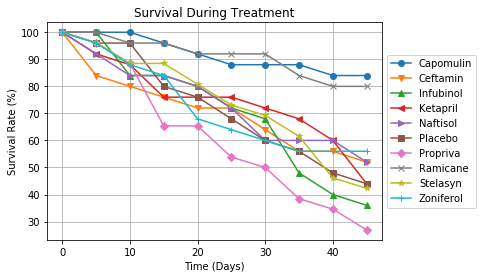

In [20]:
# Generate the Plot (Accounting for percentages)
graph_survive_rate = df_survive_rate.plot(grid=True, title="Survival During Treatment")

#style
graph_survive_rate.set_ylabel("Survival Rate (%)")
graph_survive_rate.set_xlabel("Time (Days)")

markers = ['o','v','^','<','>','s','D','x','*','+']
for i,line in enumerate(graph_survive_rate.get_lines()):
    line.set_marker(markers[i])
    
graph_survive_rate.legend(loc="center left", bbox_to_anchor=(1, 0.5))


# Save the Figure
plt.savefig('graph_survive_rate.png', bbox_inches="tight")

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
change_table = df_tumor_volume_mean_reform.reset_index().drop(columns="Timepoint")
change_percent = (change_table.loc[9]-change_table.loc[0])/change_table.loc[0]*100

# Display the data to confirm
pd.options.display.float_format = '{:,.2f}'.format
change_percent

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

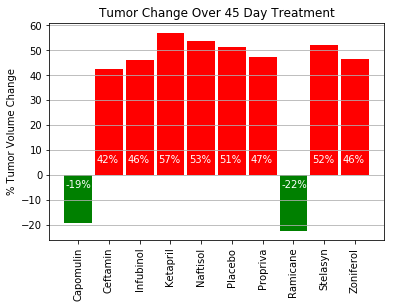

In [56]:
# Store all Relevant Percent Changes into a Tuple
change_percent_tuple = tuple(change_percent.values)
drug_name = change_percent.index.tolist()
percent_label = [str(int(i))+'%' for i in change_percent_tuple]
index = np.arange(len(change_percent_tuple))

# Splice the data between passing and failing drugs
bar_width = 0.9
# bar_color = ['g','r','r','r','r','r','r','g','r','r']
bar_color = ['g' if i <0 else 'r' for i in change_percent_tuple]
y_pos = [-5 if i <0 else 5 for i in change_percent_tuple]

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(index, drug_name, rotation = "vertical")
plt.grid(b=True, axis="y")

plt.bar(index, change_percent_tuple, color=bar_color, width = bar_width)
# Use functions to label the percentages of changes
for i in index:
    plt.text(i-0.4, y_pos[i], s= percent_label[i], color = 'white')

#plt.text(0-0.4,1,"-19%")
#plt.text(1-0.4,1,"42%")
#plt.text(2-0.4,1,"46%")
#...

# Call functions to implement the function calls

# Save the Figure
plt.savefig('graph_drug_effect.png', bbox_inches="tight")

# Show the Figure

